### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the first dataset

In [2]:
mall_customers_info = pd.read_csv("datasets/mall_customers_info.csv")

mall_customers_info.head()

CustomerID  Gender  Age  Annual_Income
0           1    Male   19             15
1           2    Male   21             15
2           3  Female   20             16
3           4  Female   23             16
4           5  Female   31             17

In [3]:
mall_customers_info.shape

(150, 4)

### Loading another dataset

In [4]:
mall_customers_scores = pd.read_csv("datasets/mall_customers_score.csv")

mall_customers_scores.head()

CustomerID  Spending Score (1-100)
0           1                      39
1           2                      81
2           3                       6
3           4                      77
4           5                      40

In [5]:
mall_customers_scores.shape

(150, 2)

#### Both datasets are from  the  same source and and they share a common column `CustomerID`
* This two datasets can be combined by `pandas.merge` function

In [6]:
customer_data = pd.merge(mall_customers_info,
                 mall_customers_scores[['CustomerID', 'Spending Score (1-100)']],
                 on='CustomerID')

In [7]:
customer_data.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)
0           1    Male   19             15                      39
1           2    Male   21             15                      81
2           3  Female   20             16                       6
3           4  Female   23             16                      77
4           5  Female   31             17                      40

In [8]:
print(customer_data.shape)

(150, 5)


### Loading the third dataset

In [9]:
customers_data_2 = pd.read_csv("datasets/customers_data_2.csv")

customers_data_2.head()

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)
0         151    Male   43             78                      17
1         152    Male   39             78                      88
2         153  Female   44             78                      20
3         154  Female   38             78                      76
4         155  Female   47             78                      16

In [10]:
customers_data_2.shape

(50, 5)

#### This dataset has the same source as others and it contains the rest of the customer data 
* This two datasets can be concatenate with panda `pandas.concatenate`

In [11]:
customers_data_com = pd.concat([customer_data, customers_data_2])
customers_data_com.sample(10)

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)
108         109    Male   68             63                      43
12          163    Male   19              7                       5
83           84  Female   46             54                      44
42           43    Male   48             39                      61
60           61    Male   70             46                      56
3             4  Female   23             16                      77
143         144  Female   32             76                      87
76           77  Female   45             54                      53
34          185  Female   41             99                      39
88           89  Female   34             58                      60

* The index numbers were wrong due to the merge

In [12]:
customers_data_com.reset_index(inplace=True, drop=True) 

In [13]:
customers_data_com.shape

(200, 5)

In [14]:
customers_data_com.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual_Income              int64
Spending Score (1-100)     int64
dtype: object

In [15]:
customers_data_com.describe()

CustomerID         Age  Annual_Income  Spending Score (1-100)
count  200.000000  200.000000     200.000000               200.00000
mean   100.500000   39.115000      59.815000                50.61500
std     57.879185   13.821612      27.738564                25.63283
min      1.000000   18.000000       6.000000                 1.00000
25%     50.750000   29.000000      40.000000                35.00000
50%    100.500000   36.000000      60.500000                50.00000
75%    150.250000   49.000000      77.250000                73.00000
max    200.000000   70.000000     170.000000                98.00000

In [16]:
customers_data_com.to_csv('datasets/combined_customers_data', index=False)

### Checking null value

In [17]:
customers_data_com.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income             False
Spending Score (1-100)    False
dtype: bool

#### Unique enteries in each of the columns

In [18]:
customers_data_com.nunique()

CustomerID                200
Gender                      2
Age                        50
Annual_Income              67
Spending Score (1-100)     82
dtype: int64

### Visualizing the data

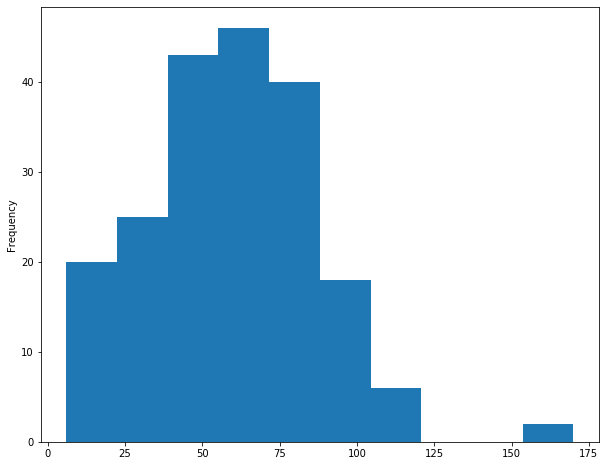

In [19]:
customers_data_com['Annual_Income'].plot.hist(bins=10, figsize=(10, 8));

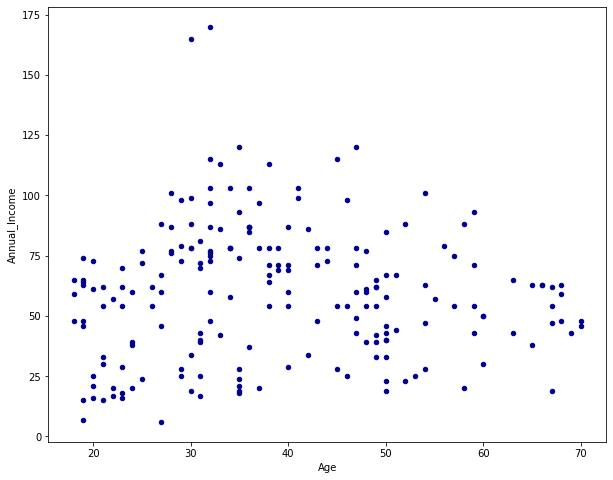

In [20]:
customers_data_com.plot.scatter(x='Age',
                                y='Annual_Income',
                                c='DarkBlue',
                                figsize=(10, 8));

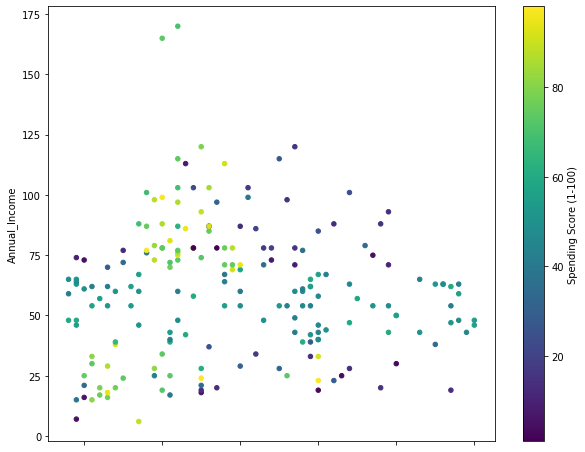

In [21]:
customers_data_com.plot.scatter(x='Age',
                                y='Annual_Income',
                                c='Spending Score (1-100)',
                                colormap='viridis',
                                figsize=(10, 8));

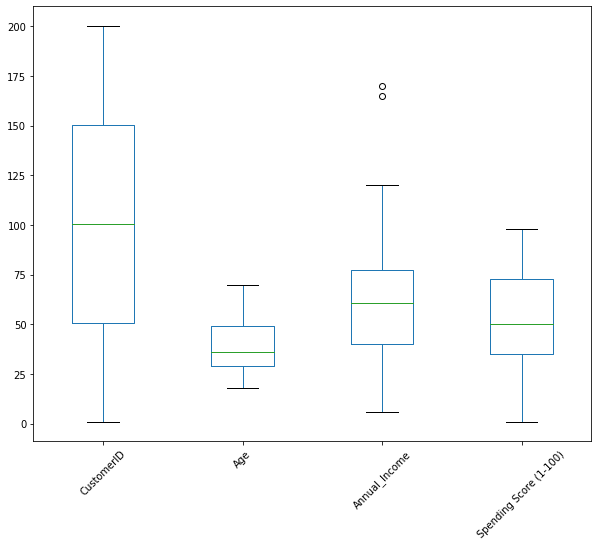

In [22]:
boxplot = customers_data_com.boxplot(grid=False, rot=45, figsize=(10, 8));

* Annual Income field has outliers

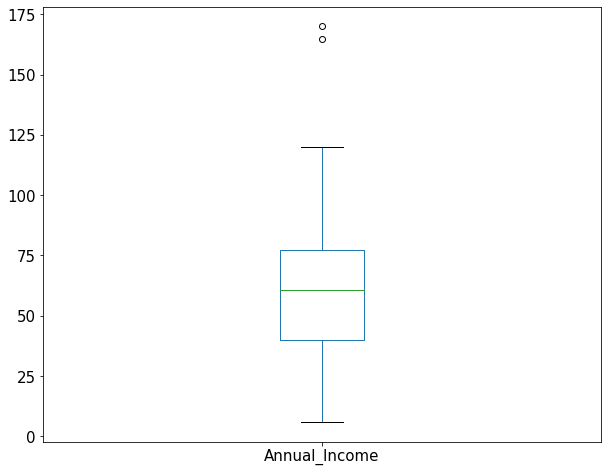

In [23]:
boxplot = customers_data_com.boxplot(grid=False, fontsize=15, 
                                     column=['Annual_Income'], figsize=(10, 8));

In [24]:
customers_data_com.loc[customers_data_com['Annual_Income'] > 125]                                         

CustomerID Gender  Age  Annual_Income  Spending Score (1-100)
198         199   Male   32            170                      70
199         200   Male   30            165                      73

### IQR (Interquartile range) method
Boxplots use the IQR method to display data and outliers(shape of the data) but in order to get a list of identified outlier and to retrieve the outlier data mathematical formula should be used.

The `interquartile range` (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1

In [25]:
Q1 = customers_data_com['Annual_Income'].quantile(0.25)
Q3 = customers_data_com['Annual_Income'].quantile(0.75)

In [26]:
print(Q1, Q3)

40.0 77.25


In [27]:
IQR = Q3 - Q1

In [28]:
print(IQR)

37.25


In [29]:
minimum = Q1 - 1.5 * IQR

maximum = Q3 + 1.5 * IQR

In [30]:
minimum

-15.875

In [31]:
maximum

133.125

#### As the Minimum value of `Annual_Income` is less than the minimum value, mentioning one condition is enough

In [32]:
customers_data_com['Annual_Income_Outlier'] = False

In [33]:
Q1 + 1.5 * IQR

95.875

In [34]:
for index, row in customers_data_com.iterrows():
    
    if row['Annual_Income']  > (Q1 + 1.5 * IQR):
        customers_data_com.at[index, 'Annual_Income_Outlier'] = True

In [35]:
customers_data_com['Annual_Income_Outlier'].sum()

20

#### Including outliers in the mean calculation, another way would be to not include outliers

In [36]:
mean = customers_data_com['Annual_Income'].mean()
mean

59.815

In [37]:
for index, row in customers_data_com.iterrows():
    
    if row['Annual_Income_Outlier']  == True:
        customers_data_com.at[index, 'Annual_Income'] = mean

In [38]:
customers_data_com.sample(5)

CustomerID  Gender  Age  Annual_Income  Spending Score (1-100)  \
176         177    Male   58             88                      15   
92           93    Male   48             60                      49   
13           14  Female   24             20                      77   
179         180    Male   35             93                      90   
44           45  Female   49             39                      28   

     Annual_Income_Outlier  
176                  False  
92                   False  
13                   False  
179                  False  
44                   False

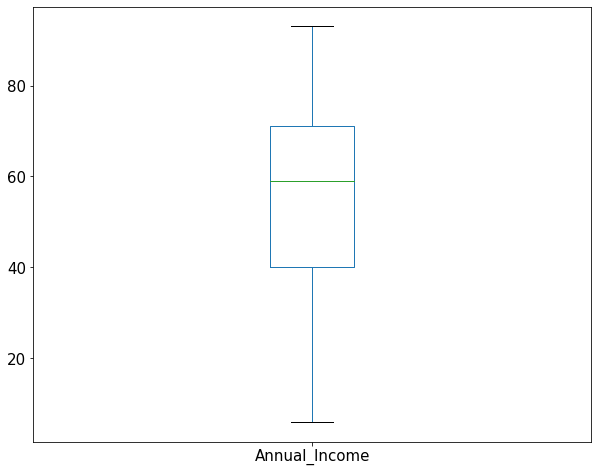

In [39]:
boxplot = customers_data_com.boxplot(grid=False, fontsize=15, 
                                     column=['Annual_Income'], figsize=(10, 8));